In [1]:
import pandas as pd
from insight_utils import bar_groups_chart, box_plot
from constants import FORMAT_MODIFIERS, DENSENESS_MODIFIERS, DENSENESS_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
results_path = "results/gpt-3.5-turbo-16k/"
base_prompt_df = pd.read_csv(results_path + "base_prompt.csv")
denseness_df = pd.read_csv(modifiers_path + "denseness.csv")

#### Format

In [2]:
denseness_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rouge_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,compendious,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.083333,0,1,2,9,2.95,4.35,4.40,4.20,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,compendious,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.000000,0,1,3,9,3.00,4.45,4.40,4.15,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,compendious,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,"[0.30918529629707336, 0.21039502322673798, 0.2...","[0.4827586206896552, 0.33333333333333337, 0.48...",...,0.083333,0,1,2,9,2.95,4.50,4.35,4.15,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,compendious,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,"[0.2704331874847412, 0.21361057460308075, 0.28...","[0.4834123222748815, 0.3761467889908257, 0.514...",...,0.000000,0,1,3,9,3.00,4.40,4.45,4.05,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,comprehensive,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Concentration of AI in Big Tech Companies\...,stop,"[0.28167083859443665, 0.19927000999450684, 0.2...","[0.4951456310679612, 0.36619718309859156, 0.44...",...,0.083333,0,1,2,9,2.90,4.60,4.25,4.20,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [3]:
for m in DENSENESS_MODIFIERS:
    print(m)

compendious
comprehensive
concise
compressed
succinct
pithy
terse
epigrammatic
telegraphic
condensed
aphoristic
compact
laconic
apothegmatic


In [4]:
denseness_df.describe()

,num_examples,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,422.0,422.0,422.000000,422.000000,422.000000,422.000000,422.0,422.0,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.0,0.0,0.994669,0.656398,0.072275,0.017180,0.0,1.0,1.272512,7.758294,2.890166,4.397488,4.469692,4.211445
std,0.0,0.0,0.012574,1.251296,0.107958,0.043186,0.0,0.0,1.123767,2.019705,0.116171,0.174375,0.157222,0.121111
min,0.0,0.0,0.927943,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,2.150000,3.950000,4.000000,3.950000
25%,0.0,0.0,0.995370,0.000000,0.000000,0.000000,0.0,1.0,0.000000,7.000000,2.850000,4.250000,4.350000,4.150000
50%,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,9.000000,2.950000,4.400000,4.450000,4.200000
75%,0.0,0.0,1.000000,1.000000,0.083333,0.000000,0.0,1.0,2.000000,9.000000,2.950000,4.537500,4.600000,4.300000
max,0.0,0.0,1.000000,6.000000,0.583333,0.250000,0.0,1.0,3.000000,9.000000,3.000000,4.850000,4.850000,4.550000


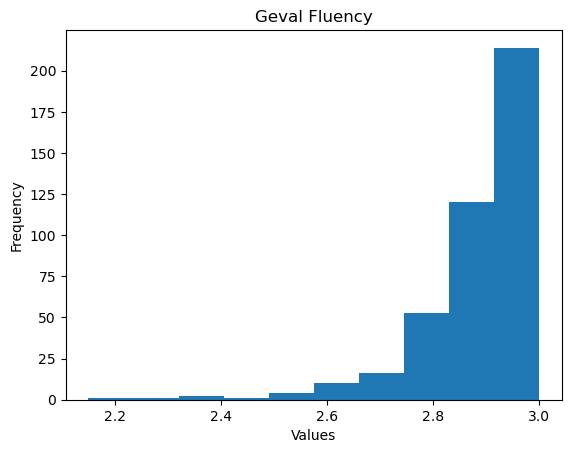

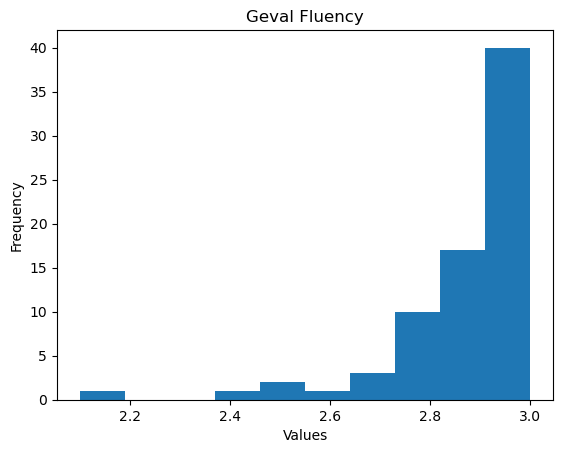

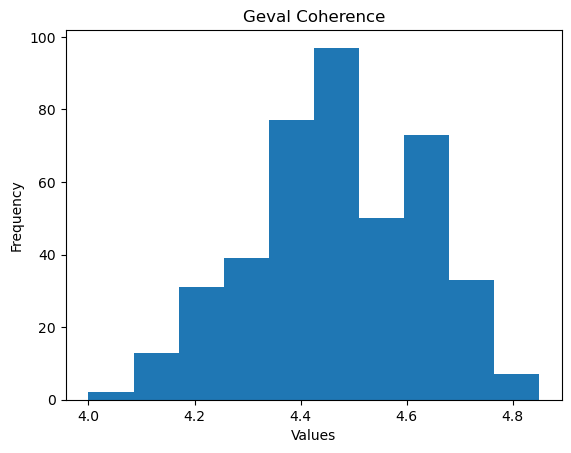

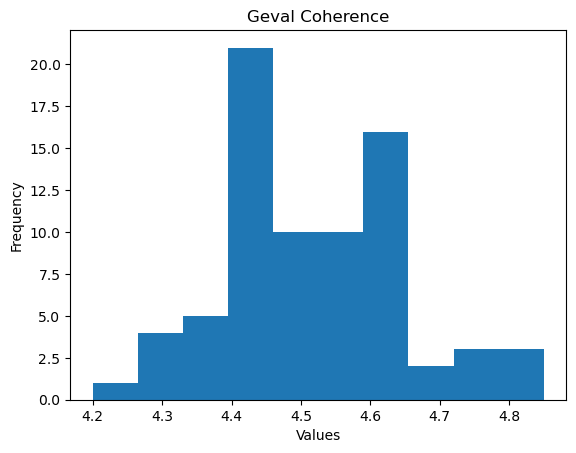

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(denseness_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(base_prompt_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(denseness_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

plt.hist(base_prompt_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

#### Split results by modifier into separate dataframes

In [6]:
dataframes = [base_prompt_df]

for modifier in DENSENESS_MODIFIERS:
    modifier_df = denseness_df[denseness_df["prompt_template"] == modifier]
    modifier_df = modifier_df[modifier_df["three_by_three"] == 1]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")



####### 30 tries per modifier #######



#### To evaluate: entailment, errors, geval_fluency, geval_coherence

d:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


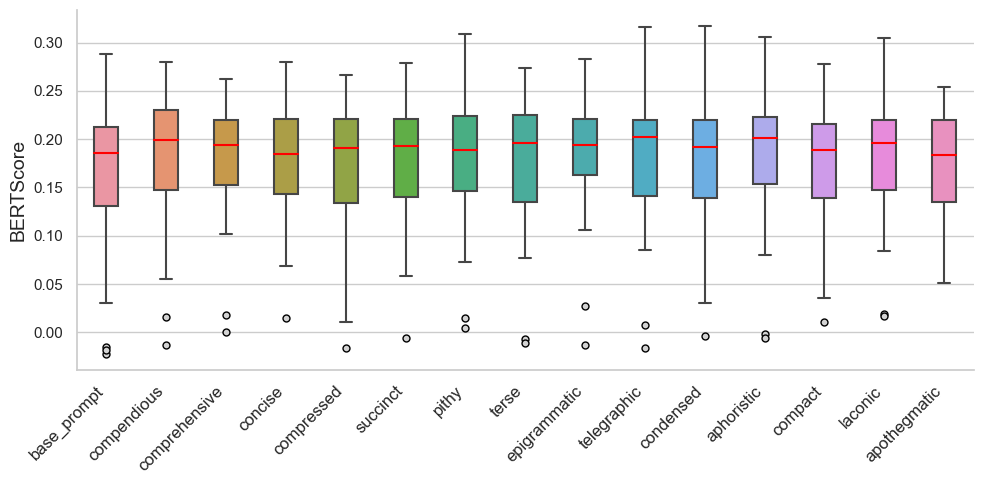

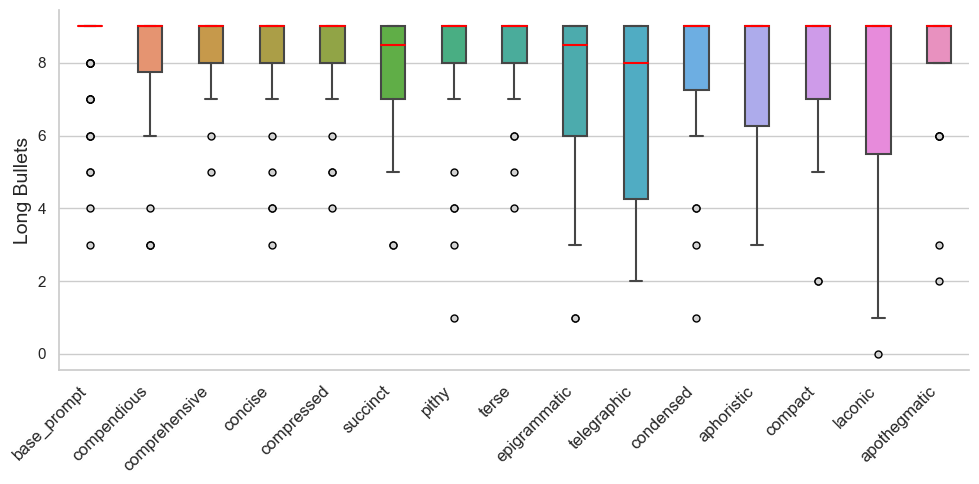

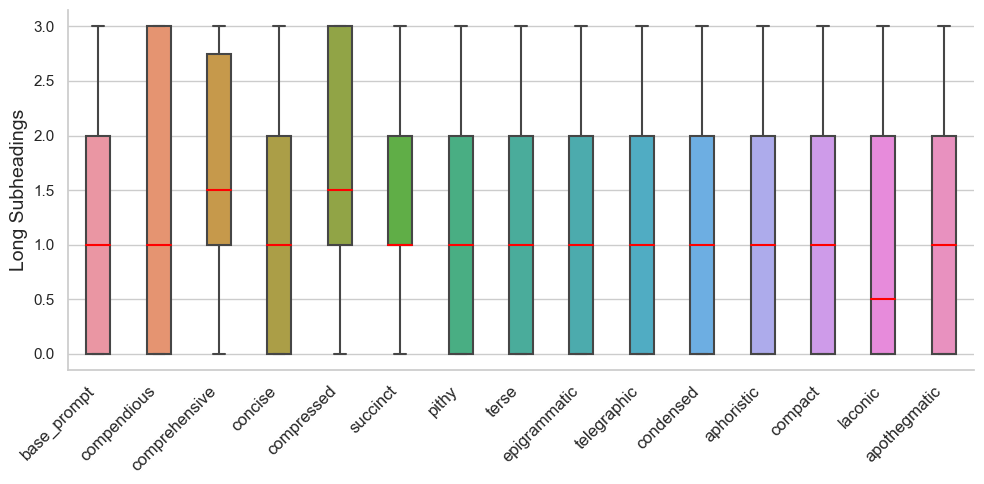

In [7]:
evaluate = [
        # "rouge_1",
        # "rouge_2",
        # "rouge_L",
        "bert_score",
        "long_bullets",
        "long_subheadings",
        # "contradiction_ratio",
        # "errors",
        # "geval_fluency",
        # "geval_relevance",
        # "geval_coherence",
        # "geval_consistency",
    ]

for eval in evaluate:
    box_plot(dataframes, ["base_prompt"] + DENSENESS_MODIFIERS, eval, height=5, width=10)


# dic = {}

# for i, df in enumerate(dataframes):
    # success_rate = (df["three_by_three"].sum() / 30) * 100
    # modifier = QUALITY_MODIFIERS[i]
    # dic.update({modifier: round(success_rate)})

# sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
# result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

# print(result_df.style.to_latex())